# Q1 (a)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image
import random

In [14]:
def plotUnitCircle(p):
# plot some 2D vectors with p-norm <= 1 
 for i in range(5000):
  x = np.array([random.random()*2-1,random.random()*2-1])
  if np.linalg.norm(x,p) <= 1:
    plt.plot(x[0],x[1],'g*')
 plt.axis([-1.5, 1.5, -1.5, 1.5])
 plt.show()

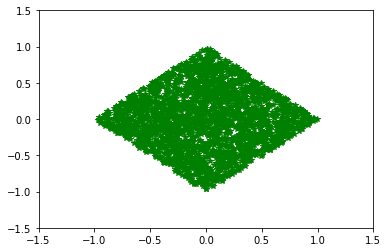

In [15]:
plotUnitCircle(1)

In [16]:
plotUnitCircle(2)

# Q1 (b)

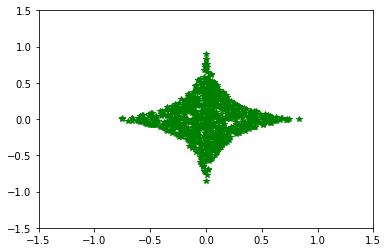

In [17]:
plotUnitCircle(0.5)

# Q2

In [2]:
def fun_seq(x,i):
    if x>0 and x<=(1/3) :
        return 1
    elif x<=(1/3)*(1+(1/i)) and x>(1/3):
        return 1-(3*i*x-(i))
    elif x>(1/3)*(1+(1/i)) and x<=1:
        return 0

In [13]:
x=np.linspace(0, 1, 4000)
v=np.array([0])
for i in range(3999):
  k=func(x[i],3)  # here you can change the value of slope as the slope increases the function beacome unit step fuction
  v= np.append(v,k)

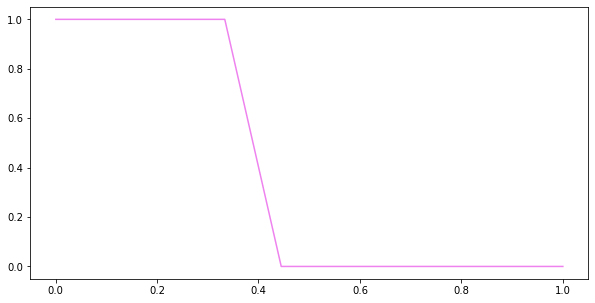

In [15]:
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, v, color='violet')
 
# Show the plot
plt.show()

# Q3 (a)

In [3]:
def calcEntropy(p):
    entropy= 0
    for x in p:
        if x > 0:
            entropy += - x * math.log(x, 2)
    return entropy


In [22]:
pmf = [0.5, 0.25, 0.125, 0.125]                 
entropy = calcEntropy(pmf)
print("Entropy (in bits): " + str(entropy))

Entropy (in bits): 1.75


# Q3 (b)

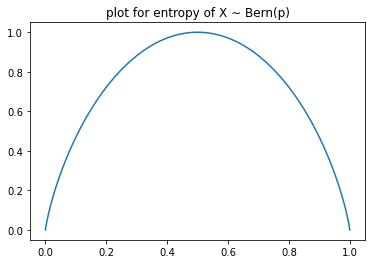

In [24]:
p = np.linspace(0, 1, 2000)
pmf = []

for i in p:
    pmf.append([i,1-i])
    
entropy = list(map(calcEntropy, pmf))
plt.plot(p, entropy)
plt.title('plot for entropy of X ∼ Bern(p)')
plt.show()

### Maxima of plot is at 0.5

# Q4 (a)

In [3]:
from PIL import Image

In [20]:
def plot_normal_histo(img):
    count_int = np.zeros(256)
    pixel_count = np.arange(256)
    
    n_pixels = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            count_int[img[i][j]] += 1
            n_pixels += 1
    count_int = count_int/n_pixels
    plt.bar(pixel_count, count_int)
    plt.show()
    return count_int


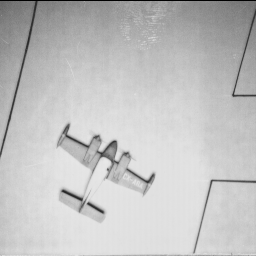

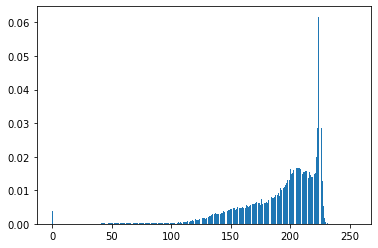

In [9]:
img = Image.open('5.1.11.tiff')
display(img)
count = plot_normal_histo(np.asarray(img))

# Q4 (b)

In [10]:
entropy = calcEntropy(count)
print("Entropy of graycscale image :" ,entropy)

Entropy of graycscale image : 6.452275232463874


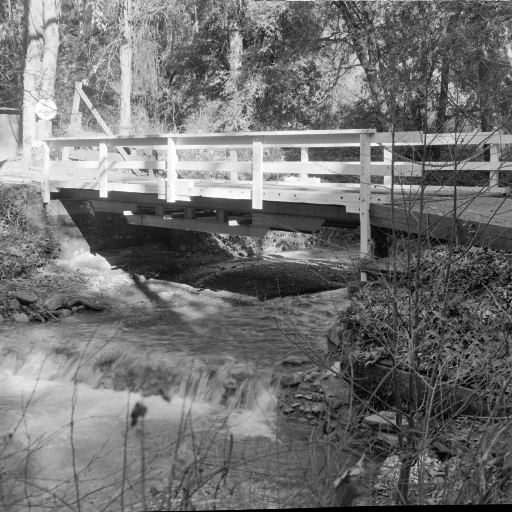

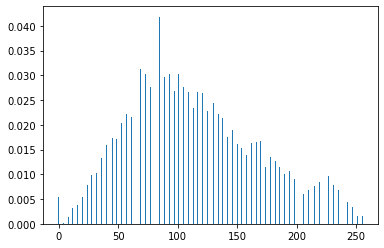

5.705560157916679


In [19]:
image = Image.open('5.2.10.tiff')
display(image)
count = plot_normal_histo(np.asarray(image))

entropy = calcEntropy(count)
print(entropy)

In [16]:
image = Image.open('5.1.14.tiff')
display(image)
count = plot_normal_histo(np.asarray(image))

entropy = calcEntropy(count)
print(entropy)

7.342432512894014


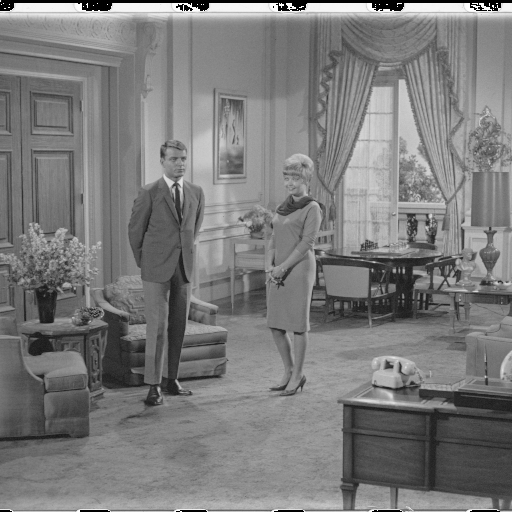

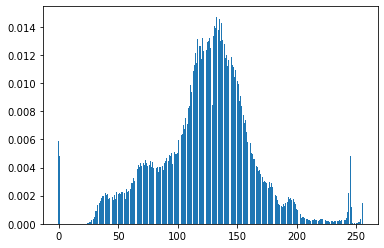

7.201007959852423


In [20]:
image = Image.open('5.2.08.tiff')
display(image)
count = plot_normal_histo(np.asarray(image))

entropy = calcEntropy(count)
print(entropy)

# Q5(a)

In [6]:
def joint_hist(img1, img2):
    
    count = np.zeros((256, 256))
    x = []
    y = []
    dz = []
    
    for i in range(np.shape(img1)[0]):
        for j in range(np.shape(img1)[1]):
            count[img1[i][j]][img2[i][j]] += 1
            
    count = count/(np.shape(img1)[0] * np.shape(img1)[1])
            
    for i in range(len(count)):
        for j in range(len(count[0])):
            x.append(i)
            y.append(j)
            dz.append(count[i][j])

    dx = [1.5] * 256 * 256
    dy = [1.5] * 256 * 256
    z = [0] * 256 * 256
    
    fig = plt.figure(figsize=(80, 30))
    ax = fig.add_subplot(projection='3d')
    ax.bar3d(x, y, z, dx, dy, dz, color='violet') 
    plt.show()
    return count
    
    


In [7]:
img1 = Image.open('left.png')
img2 = Image.open('right.png')
plot_joint = joint_hist(np.asarray(img1), np.asarray(img2))

# Q5(b)

In [3]:
def get_joint_entropy(pmf):
    entropy = 0
    for i in range(len(pmf)):
        for j in range(len(pmf[0])):
            if pmf[i][j]:
                entropy = entropy +  (-pmf[i][j] * math.log2(pmf[i][j]))
    return entropy
    



In [4]:

pmf = np.array([[0.125, 0.0625, 0.3125, 0.3125],                    
               [0.0625, 0.0125, 0.3125, 0.3125],
               [0.0625, 0.0625, 0.0625, 0.0625],
               [0.25, 0, 0, 0]])                 # pmf(i, j) is the probability of Y, X taking value i, j respectively


In [5]:
get_joint_entropy(pmf)

4.551613982576889

# Q5(c)

In [9]:
pmf = joint_hist(np.asarray(img1), np.asarray(img2))
get_joint_entropy(pmf)

13.675203263376206

# Q6(a)

In [10]:
def conditional_pmf(joint_pmf, ix, val):
    if ix == 0:
        x = joint_pmf[val, :]
        conditional_pmf = x / joint_pmf[val, :].sum()
    elif ix == 1:
        x = joint_pmf[:, val]
        conditional_pmf = x / joint_pmf[:, val].sum()
    return conditional_pmf


In [11]:
    
joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])          # joint_pmf(i, j) is the probability of Y, X taking value i, j respectively
ix = 1                                   # conditioning on column variable
val = 1
conditional_pmf(joint_pmf, ix, val)

array([0.25, 0.5 , 0.25, 0.  ])

# Q6(b)

In [12]:
def conditional_entropy(joint_pmf, ix):
    
    conditional_entropy = 0
    
    for i in range(len(joint_pmf)):                           # loop over Y
        for j in range(len(joint_pmf[0])):                    # loop over X
            if ix == 0:
                conditional_probability = conditional_pmf(joint_pmf, ix, i)[j]
            elif ix == 1:
                conditional_probability = conditional_pmf(joint_pmf, ix, j)[i]
                
            if conditional_probability:
                conditional_entropy += joint_pmf[i][j] * math.log2(1/conditional_probability)
                
    return conditional_entropy


In [13]:

joint_pmf = np.array([[1/8, 1/16, 1/32, 1/32],                    
               [1/16, 1/8, 1/32, 1/32],
               [1/16, 1/16, 1/16, 1/16],
               [1/4, 0, 0, 0]])
ix = 0
conditional_entropy(joint_pmf, ix)

1.375

# Q6(c)

In [14]:
joint_pmf = joint_hist(np.asarray(img1), np.asarray(img2))
print(joint_pmf)
ix = 1
conditional_entropy(joint_pmf, ix)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.80844907e-05 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.43605324e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


nan

# The first row of the array is all zeros and so we can't find conditional pmf, hence conditional entropy can't be found.

# Q7 (a)

In [15]:
def kl_divergence(p, q):
    if np.all(q):
        kl_divergence = 0
        for i in range(len(p)):
            kl_divergence += p[i] * math.log2(p[i]/q[i])
        return kl_divergence
    else:
        return "Distribution in the denominator has zero values"


In [16]:
p = [0.8, 0.2]
q = [0.7, 0.3] 

print("D(p||q): " + str(kl_divergence(np.asarray(p), np.asarray(q))))

D(p||q): 0.03712356220968567


# Q7 (b)

In [17]:
r = 0.3                                           # fixed value of r

p = [1-r, r]

s = np.linspace(0, 1, 10000)
s = s[1:len(s)-1]
D_pq = list()
D_qp = list()
for val in s:
    D_pq.append(kl_divergence(p, [1-val, val]))
    D_qp.append(kl_divergence([1-val, val], p))
plt.plot(s, D_pq, label="D(p||q)")
plt.plot(s, D_qp, label="D(q||p)")
plt.legend(loc="upper right")
plt.show()

### Observations:

ii. D(p||q) and D(q||p) are indeed non-negative, as can be seen from the plot

iii. Both D(p||q) and D(q||p) are zero only when r = s

In [18]:
plt.plot(s, D_pq)
plt.plot(s, D_qp)
plt.axhline(y=0, linestyle='--')
plt.axvline(x=r, linestyle='--')
plt.plot(r, 0, ls="", marker="o")
plt.show()

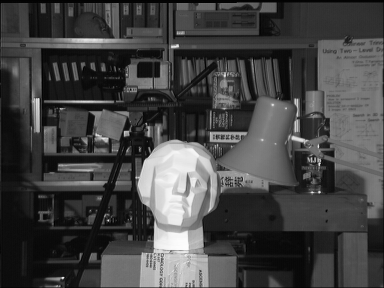

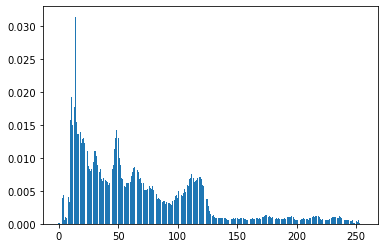

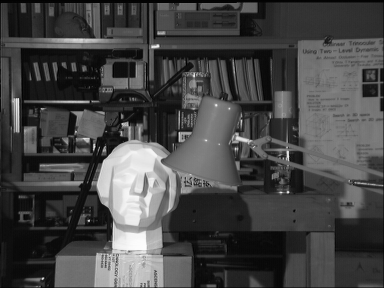

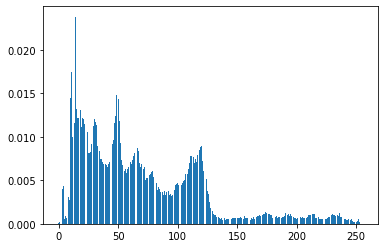

D(p||q): Distribution in the denominator has zero values
D(q||p): Distribution in the denominator has zero values


In [21]:
image1 = Image.open('left.png'); display(image1)
p = plot_normal_histo(np.asarray(image1))

image2 = Image.open('right.png'); display(image2)
q = plot_normal_histo(np.asarray(image2))

D_pq = kl_divergence(p, q)
D_qp = kl_divergence(q, p)

print("D(p||q): " + str(D_pq))
print("D(q||p): " + str(D_qp))

(iv) KL-divergence D(p||q) is a better metric when we want to measure distance between numbers in fractional (probability) form.